# Basic Statistics (Part 2)

**Prerequisite:**
- Basic Stats (part 1)


**We will learn:**
- Probability distribution function (PDF)
- Gaussian distribution, Poisson distribution

**We will use them to understand**
- Detectors and astronomical images
- Calibration frames: bias, flat field, dark

A good reference: [A Beginner Guide to Astro-Statistics and Astro-Machine-Learning, by Yuan-Sen Ting](https://computeastro.streamlit.app/)

In [2]:
# Let's start with importing our packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

---

## 1. Gaussian (normal) distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is *the* most important distribution in statistics. The probability distribution function (PDF) has a *beautiful* form of
$$p(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}},$$
where $e=2.71828..$ is the base of natural logarithms, and $\mu$ and $\sigma$ control the centroid and the width (dispersion) of the distribution, respectively. A normal distribution is often written as $\mathcal{N}(\mu, \sigma^2)$. Its PDF has a bell-like shape. 

For a random variable following a normal distribution, its mean is $\mu$ and its standard deviation is $\sigma$. Let's check it by sampling from a standard normal distribution, whose $\mu=0$ and $\sigma=1$. 

In [3]:
n_sample = 10000 # sample size
mu, sigma = 0, 1 # standard normal distribution
data = np.random.normal(loc=mu, scale=sigma, size=(n_sample))

In [4]:
data.shape

(10000,)

In [5]:
np.mean(data), np.median(data), np.std(data)
# Indeed, the mean and median of this data is very close to 0. 
# The standard deviation is very close to 1. 

(-0.002490957094364471, -0.010120480767384855, 0.9979916643379977)

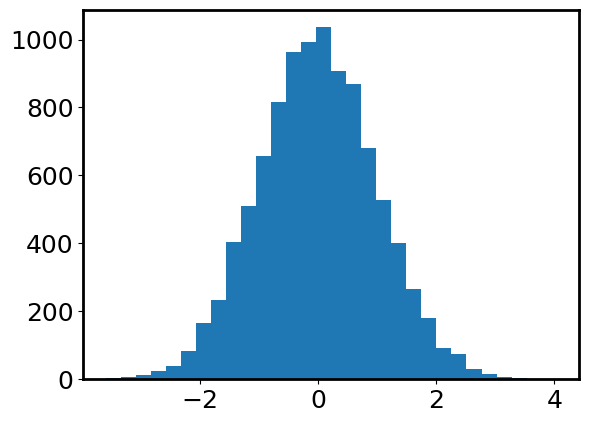

In [6]:
# Let's visualize it
plt.hist(data, bins=30);

From this histogram, we indeed see that the distribution is centered at 0 and has a bell-like shape. More importantly, we see that most data points fall within $[-3, 3]$. Let's try to count how many data points are outside of $[-3, 3]$. This is equivalent to asking how many data points are $>3$ away from the mean $\mu=0$.

In [7]:
np.sum(np.abs(data) > 3)

31

```{margin}
Here I'm using `f-string` to format a string in python. See [here](https://realpython.com/python-f-strings/) for more information. 
```

In [8]:
fraction = np.sum(np.abs(data) > 3) / len(data)
print(f'Only {fraction * 100}% of the data points are outside of [-3, 3].')

Only 0.31% of the data points are outside of [-3, 3].


More generally speaking, for a random variable following a normal distribution $\mathcal{N}(\mu, \sigma^2)$, the chance of being $3\sigma$ away from the mean value $\mu$ is very very slim (rigorously speaking, $P(|x-\mu|>3\sigma) = 0.0027$). 

This leads us to the **["68–95–99.7 rule"](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)**, which describes the fact that, for a normal distribution, the percentage of values that lie within $1\sigma$, $2\sigma$, and $3\sigma$ from the mean is 68%, 95%, and 99.7%. 

$$
P(-1\sigma < x-\mu < 1\sigma) = 0.68,\quad P(-2\sigma < x-\mu < 2\sigma) = 0.95,\quad P(-3\sigma < x-\mu < 3\sigma) = 0.997
$$

It is useful to remember these three numbers.


### Exercise 1

1. Let's sample a standard normal distribution by doing `Xs = np.random.normal(0, 1, n_sample)`, where `n_sample = 1000`.
2. Define a new random variable `Ys = Xs + 3`. What's the mean and the standard deviation of this random variable `Ys`? You can also try to validate your answer using `np.mean` and `np.std`.
3. Define a new random variable `Zs = 2 * Xs - 3`. What's the mean and the standard deviation of this random variable `Zs`?
4. **(Optional)** Extra credit: $X$ and $Y$ are two independent random variables following a standard normal distribution. What's the distribution of $X+Y$? 

In [9]:
## Your answer here

---

## 2. Poisson distribution and its relation to Gaussian

Named after the French mathematician Siméon Denis Poisson (Poisson in French means fish 🐟), a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) describes the probability of a given number of events occurring in a fixed interval of time if these events occur with a known constant mean rate. Because now the probability is a function the "number" of events, the Poisson distribution is a discrete distribution -- the values sampled from a Poisson distribution are all positive integers. 

The PDF of a Poisson distribution is 
$
P(X=k) = \dfrac{\lambda^k e^{-\lambda}}{k!},
$
where $\lambda$ is the mean event rate, and $!$ is factorial. 

In astronomy, the number of photon that we receive in a certain period of time (say during a 1000s exposure) follows a Poisson distribution. The mean rate of photons from a star is a known constant (it's related to the so-called flux). In the following, let's explore the Poisson distribution by studying the number of observed photons.

In [10]:
# Assume the average number of photon from a star is 10 during a 900s exposure
photon_rate = 4
# We "observe" this star for 500 times. 
# Each time we can count how many photons we get, denoted by $x$. 
# This is equivalent to sampling from a Poisson distribution with $\lambda = 4$
n_exposure = 1000
photon_counts = np.random.poisson(photon_rate, size=(n_exposure,))

In [11]:
photon_counts[:30]

array([ 5,  5,  1,  5,  3,  1,  4,  4,  2,  2,  4,  3,  3,  5,  4,  5,  3,
        5,  3, 10,  3,  3,  2,  2,  3,  3,  4,  3,  5,  4])

This means we get different numbers of photons in different exposures. How are they distributed?

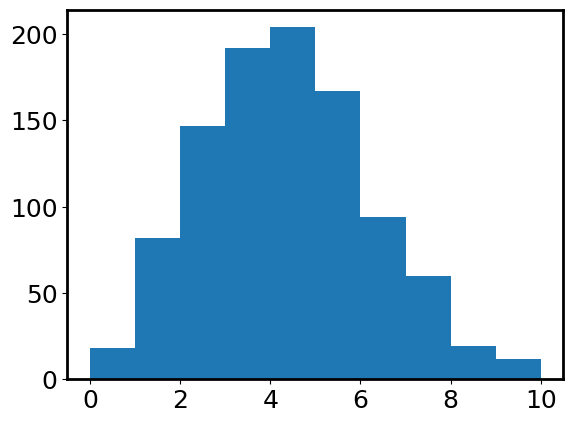

In [12]:
plt.hist(photon_counts, range=(0, 10));

We have several observations from the above figure:

- The distribution does not extend to the negative half of the x-axis. This is because Poisson distribution is only defined for $x>=0$. 
- It does not look like a bell. Instead, the shape is not quite axisymmetric. We call it "skewed". 
- It seems like the number of photons covers a wide range, but is centered around `photon_rate=4`. Let's calculate the mean, median, and variance. 

In [13]:
np.mean(photon_counts), np.median(photon_counts), np.var(photon_counts)

(3.909, 4.0, 3.818719)

It is striking that the mean, and variance are all very close to the $\lambda=$ `photon_rate` $=4$. Actually, for a Poisson distribution, its mean and variance are indeed $\lambda$. So the standard deviation is $\sqrt{\lambda}$. That means a Poission distribution with a larger $\lambda$ is also "wider" or "more dispersed". 

Now let's move to the bright side: assume the photon rate is very large, `photon_rate=2000`. And we take 10000 exposures.

In [14]:
photon_rate = 2000
n_exposure = 10000
photon_counts = np.random.poisson(photon_rate, size=(n_exposure,))

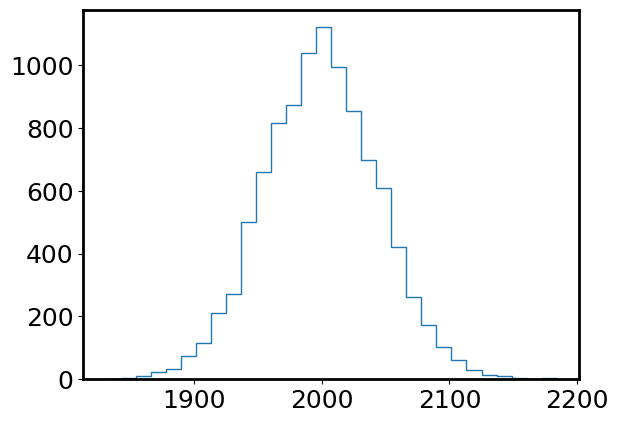

In [15]:
plt.hist(photon_counts, bins=30, histtype='step');

In [16]:
np.mean(photon_counts), np.median(photon_counts), np.var(photon_counts)

(1999.5716, 1999.0, 2002.9382734399996)

Now this Poisson distribution looks a lot more similar to a Gaussian distribution. Let's sample a Gaussian distribution with the same mean (`photon_rate`) and standard deviation (`np.sqrt(photon_rate)`) as this Poisson distribution, and compare. 

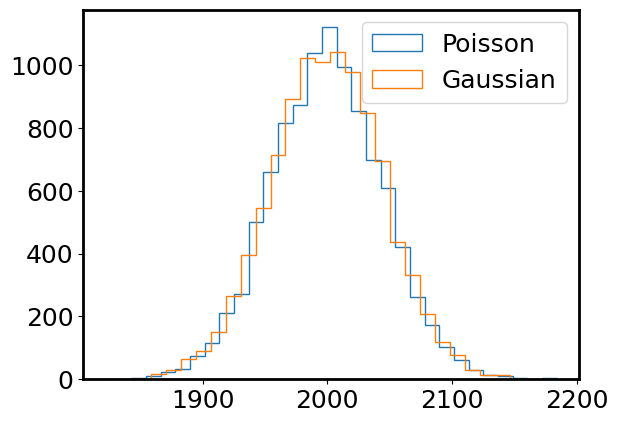

In [17]:
gaussian_data = np.random.normal(photon_rate, np.sqrt(photon_rate), size=(n_exposure,))
plt.hist(photon_counts, bins=30, histtype='step', label='Poisson');
plt.hist(gaussian_data, bins=30, histtype='step', label='Gaussian');
plt.legend();

Yes! They do look very very similar now. **For large $\lambda$, a normal distribution is an excellent approximation to a Poisson distribution.**

---

## 3. Example: A noisy image

Most astronomical data are in the form of image. An image is typically a two-dimentional array. In this section, we will try to simulate an image of a flat object which emits photon at a constant rate (`photon_rate=4`). We will also understand how to possibly reduce the noise in images. 

In [18]:
plt.rcParams['figure.figsize'] = (8, 8)

As we introduced above, each pixel of the image should follow a Poisson distribution with $\lambda=4$. 

In [19]:
# Let's define an image size, e.g., 200 x 200
img_size = 200
photon_rate = 4
img = np.random.poisson(photon_rate, size=(img_size, img_size))

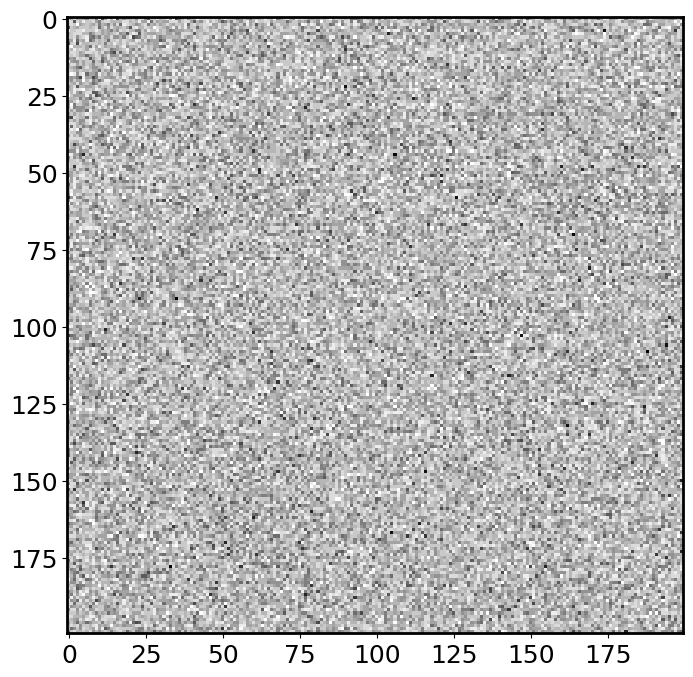

In [20]:
plt.imshow(img, cmap='binary');

This looks like the **"snow screen"** when an old TV has no connection! It is indeed what a noisy image look like! 

It would be interesting to calculate the mean and variance of this noisy image. The function `np.mean` and `np.var` supports high-dimensional data inputs, and you can even calculate the mean or std along a specific axis.

In [21]:
np.mean(img), np.var(img) # nice Poisson distribution

(4.011975, 4.025431599375)

In [22]:
# This calculate the mean for each column of the noisy image
np.mean(img, axis=0)

array([3.97 , 3.92 , 3.975, 4.015, 4.05 , 4.025, 3.875, 3.89 , 4.005,
       4.235, 3.935, 4.235, 3.97 , 4.03 , 3.965, 4.125, 3.88 , 3.94 ,
       3.98 , 3.985, 3.95 , 3.86 , 4.3  , 4.345, 4.13 , 3.865, 4.085,
       4.15 , 3.905, 3.825, 3.925, 4.145, 3.84 , 4.115, 3.795, 3.96 ,
       4.08 , 3.87 , 3.9  , 4.31 , 3.86 , 4.41 , 4.25 , 4.045, 3.925,
       3.87 , 3.965, 4.105, 3.97 , 4.075, 4.245, 3.98 , 3.925, 4.18 ,
       3.9  , 4.03 , 4.275, 3.97 , 4.11 , 4.05 , 4.285, 3.945, 4.175,
       4.28 , 3.86 , 3.905, 4.315, 3.875, 4.13 , 4.1  , 4.17 , 3.76 ,
       3.975, 4.08 , 3.985, 4.19 , 4.03 , 4.04 , 4.19 , 4.11 , 4.   ,
       4.065, 4.025, 4.15 , 3.96 , 3.995, 3.895, 3.785, 3.96 , 3.785,
       4.05 , 4.12 , 4.12 , 4.16 , 4.07 , 3.915, 3.91 , 4.13 , 4.045,
       4.215, 3.97 , 3.785, 3.76 , 3.935, 3.95 , 3.975, 3.885, 3.98 ,
       3.96 , 4.045, 4.075, 3.82 , 4.135, 3.765, 3.985, 3.93 , 3.935,
       3.84 , 3.97 , 4.015, 3.915, 4.13 , 4.22 , 4.025, 4.005, 3.925,
       3.97 , 4.01 ,

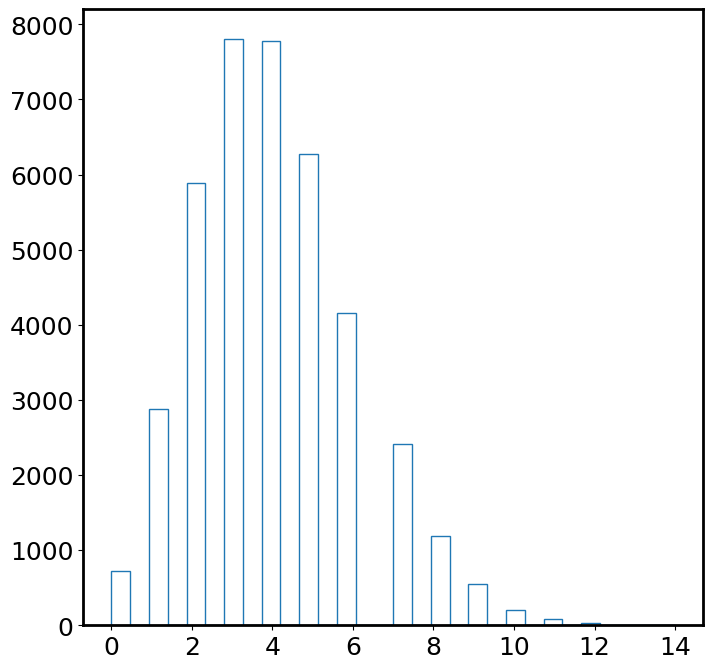

In [23]:
# We can also plot the histogram for the pixel values.
# You need to "flatten" the 2-D image to a 1-D array
plt.hist(img.flatten(), bins=30, histtype='step'); # looks like Poisson

We discuss the concept "signal-to-noise ratio" (S/N, or SNR) here. The signal we want to receive from this image is $\lambda=4$, which is the average photon rate from the object. However, the image is quite noisy. The standard deviation of pixel values is a proxy for how noisy the image is. Therefore, the SNR of this image is:

In [24]:
SNR = np.mean(img) / np.std(img)
print(SNR)

1.9996408139057964


In fact, for a Poisson distribution with $\lambda=4$, `mean=4`, `std=2`, so the SNR should just be 2.

SNR=2 is too low for any science. But you might have heard that stacking images will reduce the noise. Why not try taking 16 exposures and combining them together?

In [25]:
img_size = 200
photon_rate = 4
img_list = []
for i in range(16):
    img = np.random.poisson(photon_rate, size=(img_size, img_size))
    img_list.append(img)
    
img_list = np.array(img_list)

In [26]:
img_list.shape

(16, 200, 200)

Remember that each pixel follows a Poisson distribution with $\lambda=4$. For a pixel at a given location, it now has 16 different values from 16 exposures. We can calculate the mean or median of these values as a way to "combine" these exposure. This can be done using `np.mean(img_list, axis=0)` or `np.median(img_list, axis=0)`. `axis=0` means we are averaging along the first axis of `img_list`, i.e., averaging over different exposures.

After combining these exposures, we show the combined image using the same scale as the one above.

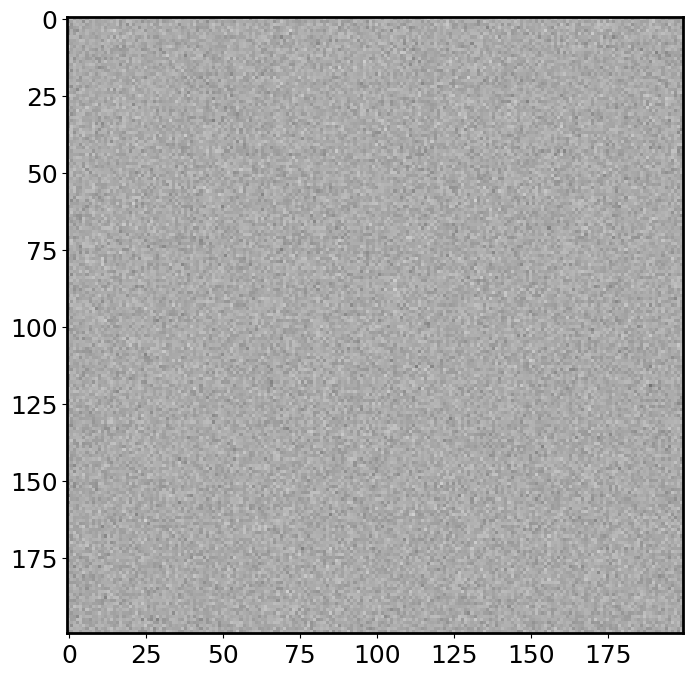

In [27]:
img_avg = np.mean(img_list, axis=0)
plt.imshow(img_avg, cmap='binary', vmin=0, vmax=12);

The combined image is much smoother (less noisy) than a single exposure image! If you increase the number of exposures, the combined image will even smoother. Another way to look at this is to plot the histogram of pixel values:

### Exercise 2

1. Plot the histograms of pixel values in a single image `img` and the combined image `img_avg`. (Tips: you can't simply do `plt.hist(img)`. You have to first flatten the 2D array by `img.flatten()`, then use `plt.hist` function). Which histogram is narrower?

2. Calculate the SNRs for a single image and the combined image.

3. How much do we boost the SNR by combining 16 single exposures? 

Now we realize that an effective way to fight down noise is to combine lots of exposures. More generally, SNR is proportional to $\sqrt{N}$ where $N$ is the number of exposures combined.

In [ ]:
## Your answer here

### Exercise 3 (optional, extra credit)

1. Generate 3000 data points from a Uniform distribution $U(0,1)$. Plot the histogram of this sample.
2. Calculate the mean of this sample.
3. Repeat the above procedure 1000 times, and record the mean of each experiment. You can use a for loop here. 
4. Plot the histogram of these "mean"s. What distribution does it look like? Replace the Uniform distribution with a Cauchy distribution (`np.random.standard_cauchy`). Do you get the same conclusion?

This example shows the central limit theorem! If you are interested, watch this Youtube video: https://www.youtube.com/watch?v=zeJD6dqJ5lo!

In [ ]:
## Your answer here